## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [3]:
df = pd.read_csv("Classified Data",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [25]:
X = df.iloc[:, :-1].values ## Grab everything except target Class, Independent Variables
y = df.iloc[:, 10].values

print(X[0])
print("\n")
print(y[0:8])

[0.91391733 1.16207271 0.56794585 0.7554639  0.78086157 0.35260772
 0.75969691 0.64379756 0.87942209 1.23140944]


[1 0 0 1 1 0 0 0]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X[0])

## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS']test_size=0.30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)

In [9]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [10]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(confusion_matrix(y_test,pred))

[[100  13]
 [ 13 124]]


In [13]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.88      0.88      0.88       113
          1       0.91      0.91      0.91       137

avg / total       0.90      0.90      0.90       250



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [23]:
error_rate = []

# Will take some time
for i in range(1,45):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

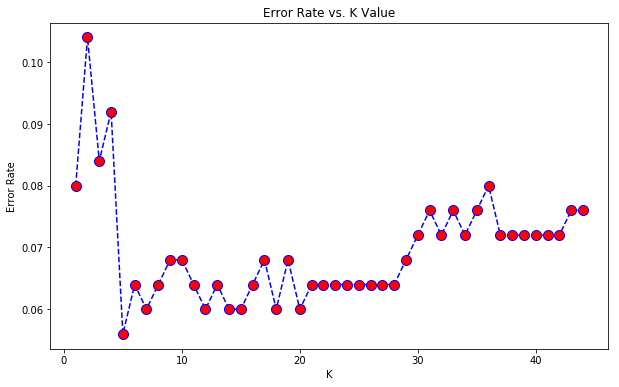

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,45),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [16]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[100  13]
 [ 13 124]]


             precision    recall  f1-score   support

          0       0.88      0.88      0.88       113
          1       0.91      0.91      0.91       137

avg / total       0.90      0.90      0.90       250



In [17]:
# NOW WITH K=5 <<< As seen from the plot >>>
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=7


[[105   8]
 [  7 130]]


             precision    recall  f1-score   support

          0       0.94      0.93      0.93       113
          1       0.94      0.95      0.95       137

avg / total       0.94      0.94      0.94       250



In [18]:
from sklearn.model_selection import cross_val_score 

accuracies_knn= cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10) 
accuracies_knn_mean=accuracies_knn.mean()*100
print("Mean Accuracy:KNN=",accuracies_knn_mean)

accuracies_knn_std=accuracies_knn.std()*100
print("Standard Deviation - Accuracy:KNN=",accuracies_knn_std)

Mean Accuracy:KNN= 92.80445708866762
Standard Deviation - Accuracy:KNN= 3.101800951945092


In [19]:
import statsmodels.formula.api as sm

In [20]:
        def backwardElimination(x, sl):
            numVars = len(x[0])
            for i in range(0, numVars):
                regressor_OLS = sm.OLS(y, x).fit()
                maxVar = max(regressor_OLS.pvalues).astype(float)
                if maxVar > sl:
                    for j in range(0, numVars - i):
                        if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                            x = np.delete(x, j, 1)
            regressor_OLS.summary()
            return x
         
        SL = 0.09 ## Changed it to 0.09
        X = backwardElimination(X, SL)

In [21]:
print(X[0])

[0.91391733 1.16207271 0.56794585 0.7554639  0.35260772 0.75969691
 0.64379756 0.87942209 1.23140944]


In [22]:
## After variable elimination with SL=0.09

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

from sklearn.model_selection import cross_val_score 

accuracies_knn= cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10) 
accuracies_knn_mean=accuracies_knn.mean()*100
print("Mean Accuracy:KNN=",accuracies_knn_mean)

accuracies_knn_std=accuracies_knn.std()*100
print("Standard Deviation - Accuracy:KNN=",accuracies_knn_std)

WITH K=7


[[104   9]
 [  5 132]]


             precision    recall  f1-score   support

          0       0.95      0.92      0.94       113
          1       0.94      0.96      0.95       137

avg / total       0.94      0.94      0.94       250

Mean Accuracy:KNN= 92.40090090090091
Standard Deviation - Accuracy:KNN= 2.7433422283172915
